In [4]:
__author__ = "@Tssp"
__date__   = "04/12/20"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelsize']=18
plt.rcParams['axes.titlesize']=18
aur = (1 + np.sqrt(5)) / 2
aursize = (4.3*aur, 4.3)

In [5]:
delta = np.loadtxt('Simulations/delta_asc.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [6]:
# Parameters and Constants:
mass  = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky    = 2*np.pi/lambd
Iy    = 4993 * (1e4 / Eh * to * ao**2)
Vy    = alpha * Iy # a.u
Iy    = Vy/alpha
wy    = np.sqrt( 2 * Vy * ky**2 / mass)       
dho   = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [7]:
print(os.getcwd())
folder_path = "Simulations/ix4993_iy4993_iz4993/config/"

/Users/tomy/PhD/Ultracold_Atoms_src/Analysis/q3d


In [8]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x10000_y10000_z10000_120rm8g2l60m14_68CM8g1L60M14_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix4993_iy4993_iz4993_LiLi_a3Sup_0{d}_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_int_rm250_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.69400', '.69900', '.70000', '.70510', '.707666', '.707891', '.7081066', '.7083468', '.708483', '.708822', '.7090032', '.7090948', '.7092404', '.7091583', '.71215', '.71220', '.71300', '.71305', '.71310', '.71315', '.71550', '.71555', '.71560', '.71565', '.71650', '.71655', '.71660', '.71670', '.71680', '.71685', '.71695', '.71705', '.71710', '.71715', '.71720', '.71725', '.71795'] non readed


In [9]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [10]:
dic = transpose_energies(Data)

In [11]:
#dic, least_bound_pos = dic_from_least_bound_forward(dic, wy)

In [12]:
least_bound_pos = 1000

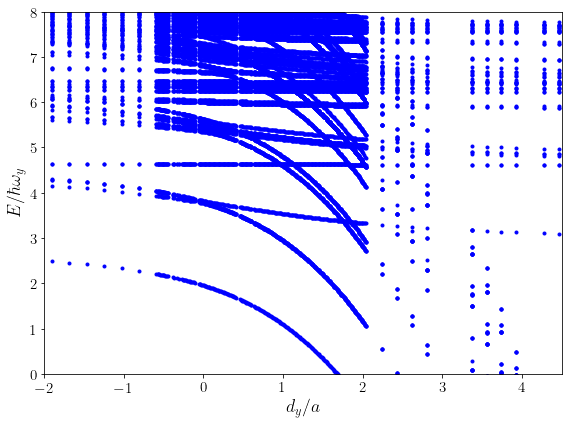

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 100):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'b.')
#ax.plot(x, dic['nivel_1004']/wy, 'r')
#ax.plot(x, dic['nivel_1000']/wy, 'r')
ax.set_ylim(0, 8)
ax.set_xlim(-2, 4.5)
ax.set_xlabel('$d_{y}/a$')
ax.set_ylabel('$E/\hbar \omega_{y}$')
plt.tight_layout()
fig.savefig('Results/Figures/Ix4993_Iy4993_Iz4993_Easc.png', dpi=200)
plt.show()

# Crosses

In [14]:
%matplotlib inline

## Resonance x=0

1001
1002
1003


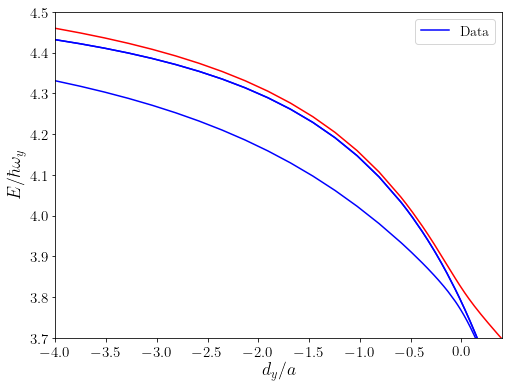

In [15]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
for i in range(least_bound_pos+1, least_bound_pos + 4):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.plot(x, dic['nivel_1004']/wy, 'r', label='trap')
ax2.set_ylim(3.7, 4.5)
ax2.set_xlim(-4, 0.4)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
#plt.savefig('Results/Figures/Ix4993_Iy4993_Iz4993_Easc_Zoom.png', dpi=200)
plt.show()

In [16]:
print(f'x={x[170]}, delta=0{delta[170]}\nx={x[263]}, delta=0{delta[263]}')

x=0.3981961227561708, delta=0.71325
x=-3.992890759687098, delta=0.73300


## Resonance x>1

1004
1005
1006
1007
1008
1009
1010


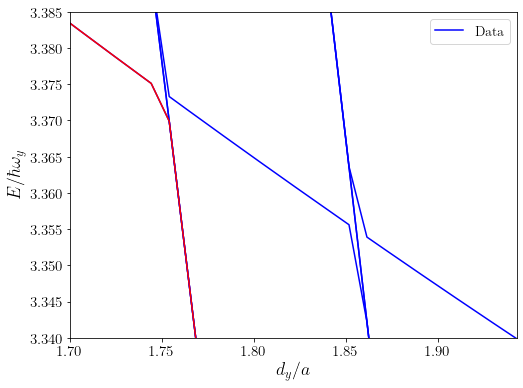

In [17]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
for i in range(least_bound_pos+4, least_bound_pos + 11):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.plot(x, dic['nivel_1004']/wy, 'r')
ax2.set_ylim(3.34, 3.385)
ax2.set_xlim(1.7, 1.943)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
#plt.savefig('Results/Figures/Ix4993_Iy4993_Iz4993_Easc_Zoom.png', dpi=200)
plt.show()

In [18]:
print(f'x={x[10]}, delta=0{delta[10]}\nx={x[55]}, delta=0{delta[55]}\nx={x[30]}, delta=0{delta[30]}\nx={x[15]}, delta=0{delta[15]}')

x=2.431929187165269, delta=0.70300
x=1.6163615747945728, delta=0.70720
x=1.8615783192707642, delta=0.70595
x=2.0076855251021195, delta=0.70520


In [22]:
%matplotlib

Using matplotlib backend: MacOSX


In [23]:
fig2, ax2 = plt.subplots(figsize=aursize)
for i in range(least_bound_pos+4, least_bound_pos + 11):
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.set_ylim(3.34, 3.385)
ax2.set_xlim(1.7, 1.943)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
plt.grid()
xcoord = []
ycoord = []
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    plt.plot(ix, iy, 'ro', markersize=4)
    plt.draw()
    global xcoord, ycoord
    xcoord.append(ix)
    ycoord.append(iy)
    if len(xcoord) == 30:
        fig2.canvas.mpl_disconnect(cid)
        print(f'xcoord: {xcoord}\n ycoord: {ycoord}')
    return xcoord, ycoord
cid = fig2.canvas.mpl_connect('button_press_event', onclick)
plt.show()

xcoord: [1.700680582556262, 1.703723186925434, 1.708687436159346, 1.7134915483211965, 1.718295660483047, 1.7227794985007743, 1.7271031994464396, 1.7315870374641666, 1.7363911496260171, 1.741995947148176, 1.7570488319219741, 1.7644151372368115, 1.7706604830472172, 1.7815498039474116, 1.7998054301624435, 1.8130968071435631, 1.8246266763320043, 1.8355159972321986, 1.8475262776368249, 1.8653014926356717, 1.872187386734324, 1.8795536920491613, 1.8885213680846156, 1.900851922633365, 1.91750617812778, 1.9242319351543706, 1.9279150878117894, 1.930157006820653, 1.933199611189825, 1.9352813931266268]
 ycoord: [3.3830214609371105, 3.3826293382462773, 3.3817330578100875, 3.3808367773738977, 3.3799404969377083, 3.3790442165015184, 3.378315988647114, 3.377363690683662, 3.3764674102474723, 3.375403077229497, 3.3728262709754513, 3.371313797739381, 3.3703054822486678, 3.368120798685455, 3.364871782104267, 3.3626310810137925, 3.3605024149778417, 3.3584857839964144, 3.3563571179604637, 3.3532761539610614

In [24]:
%matplotlib inline

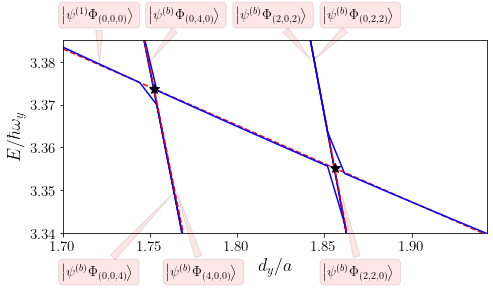

In [35]:
fig3, ax3 = plt.subplots(figsize=aursize)
# nivel 1004:
f1004 = np.polyfit(xcoord, ycoord, deg=1)
x1004 = np.linspace(1.7, 1.95, num=40)
ax3.plot(x1004, np.polyval(f1004, x1004), 'r--', markersize=4, label='Diabetic')
ax3.plot(x, dic['nivel_1004']/wy, 'b', label='Adiabatic')

# nivel 1005:
ax3.plot(x, dic['nivel_1005']/wy, 'b')

# nivel 1006:
ax3.plot(x, dic['nivel_1006']/wy, 'b')

# nivel 1007:
ax3.plot(x, dic['nivel_1007']/wy, 'b')
f1007 = np.polyfit(x[(x < 1.74) & (x > 1.7)], np.array(dic['nivel_1007'])[(x < 1.74) & (x > 1.7)]/wy, deg=1)
x1007 = np.linspace(1.6, 1.95, num=500)
ax3.plot(x1007, np.polyval(f1007, x1007), 'r--', markersize=4)

# nivel 1008:
ax3.plot(x, dic['nivel_1008']/wy, 'b')

# nivel 1009:
ax3.plot(x, dic['nivel_1009']/wy, 'b')

# nivel 1010:
f1010 = np.polyfit(x[(x < 1.85) & (x > 1.8)], np.array(dic['nivel_1010'])[(x < 1.85) & (x > 1.8)]/wy, deg=1)
x1010 = np.linspace(1.82, 1.95, num=500)
ax3.plot(x1010, np.polyval(f1010, x1010), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1010']/wy, 'b')

# Crosses:
##########
ax3.plot(cross_points(f1004, f1007), np.polyval(f1004, cross_points(f1004, f1007)), 'k*', markersize=10, label='ICIR')
ax3.plot(cross_points(f1004, f1010), np.polyval(f1004, cross_points(f1004, f1010)), 'k*', markersize=10)

# States:
#########
ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(1.721, 3.379), xytext=(1.70, 3.39), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,0,4)}\right>$', xy=(1.765, 3.35), xytext=(1.70, 3.33), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(4,0,0)}\right>$', xy=(1.765, 3.35), xytext=(1.76, 3.33), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,4,0)}\right>$', xy=(1.75, 3.38), xytext=(1.75, 3.39), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,2)}\right>$', xy=(1.843, 3.38), xytext=(1.80, 3.39), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,2)}\right>$', xy=(1.843, 3.38), xytext=(1.85, 3.39), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,2,0)}\right>$', xy=(1.86, 3.349), xytext=(1.85, 3.33), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))


ax3.set_xlabel('$d_{y}/a$')
ax3.set_ylabel('$E/\hbar \omega_{y}$')
#ax3.legend(fontsize=14, bbox_to_anchor=(1.03, 1))
ax3.set_ylim(3.34, 3.385)
ax3.set_xlim(1.7, 1.943)
plt.tight_layout()
fig3.savefig('Results/Figures/Ix4993_Iy4993_Iz4993_Easc_Interpolation_v2.png', bbox_inches="tight", dpi=200)

In [33]:
print(f'''Crosses between (x, E):
* 1004-1005: ({cross_points(f1004, f1007)}, {np.polyval(f1004, cross_points(f1004, f1007))})
* 1004-1010: ({cross_points(f1004, f1010)}, {np.polyval(f1004, cross_points(f1004, f1010))})''')

Crosses between (x, E):
* 1004-1005: (1.7524236624285894, 3.3736446247268104)
* 1004-1010: (1.855972358893736, 3.3551372012827803)


In [155]:
print(f"ICIR: asc/dy = {1/cross_points(f1004, f1005)}\nasc = {1/cross_points(f1004, f1005) * dho}")

ICIR: asc/dy = 0.5708198957617527
asc = 991.8971624713432


In [154]:
np.savetxt('Results/ICIR_positions_4993_4993_4993.txt', 
           [[1], [1/cross_points(f1004, f1005)], [np.polyval(f1004, cross_points(f1004, f1005))]], 
           header='wx/wy, asc/dy, E/hwy', )